# RayStation Bayesian Optimization Results

Results for optimizing the objective function

$$f(d,v) = (1-w)\frac{oar(d,v) - oar^*}{oar^*} + w\frac{ptv(d,v) - ptv^*}{ptv^*}$$

where $w \in \{0.25, 0.5, 0.75\}$, oar values represent average dose, and ptv values represent max dose. Values $oar(d,v)$ are results for a given pair of dose and volume objective function parameters, and $oar^*$ is the results for the approved plan.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

# Plot objective

In [2]:
def plot_objective(weight):
    """Plot convergence of objective function."""
    func_vals = np.load(f'weight_{int(100*weight)}/func_vals.npy')
    idx_min = np.argmin(func_vals)
    plt.plot(func_vals)
    plt.plot(idx_min, func_vals[idx_min], 'ro')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.title(f'Weight = {weight}')

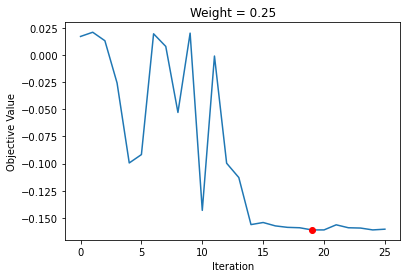

In [3]:
plot_objective(0.25)

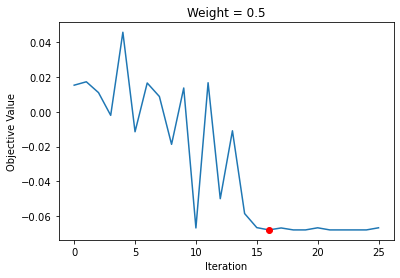

In [4]:
plot_objective(0.5)

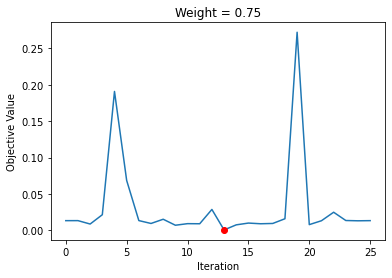

In [5]:
plot_objective(0.75)

# Plot iterates

In [6]:
# Approved plan values
oar_avg_app = 318.459
ptv_max_app = 6076.125

# Load results
oar_avg = np.load('5_28/oar_avg.npy')
ptv_d95 = np.load('5_28/ptv_d95.npy')
ptv_max = np.load('5_28/ptv_max.npy')
dvh_doses = np.load('5_28/dvh_doses.npy')
dvh_oar = np.load('5_28/dvh_oar.npy')
dvh_ptv = np.load('5_28/dvh_ptv.npy')

# Load normalized results
oar_avg_norm = np.load('5_28/oar_avg_norm.npy')
ptv_d95_norm = np.load('5_28/ptv_d95_norm.npy')
ptv_max_norm = np.load('5_28/ptv_max_norm.npy')
dvh_doses_norm = np.load('5_28/dvh_doses_norm.npy')
dvh_oar_norm = np.load('5_28/dvh_oar_norm.npy')
dvh_ptv_norm = np.load('5_28/dvh_ptv_norm.npy')

# Estimate missing data
idx = oar_avg_norm == -1
oar_avg_est = oar_avg_norm.copy()
oar_avg_est[idx] = 4800*oar_avg[idx]/ptv_d95[idx]
ptv_max_est = ptv_max_norm.copy()
ptv_max_est[idx] = 4800*ptv_max[idx]/ptv_d95[idx]

def plot_iterates(weight):
    """Plot iterates on top of grid search values."""
    # Plot objective values
    oar_change = (oar_avg_est - oar_avg_app)/oar_avg_app
    ptv_change = (ptv_max_est - ptv_max_app)/ptv_max_app
    objective = (1 - weight)*oar_change + weight*ptv_change
    plt.imshow(objective[1:, :].T, origin='lower')
    
    # Plot iterates
    x = np.load(f'weight_{int(100*weight)}/x.npy')
    x_iters = np.load(f'weight_{int(100*weight)}/x_iters.npy')
    plt.plot(7 - 1, 8, 'go', zorder=3)
    plt.plot(5.48 - 1, 9, 'co', zorder=3)
    plt.plot(x[0]/100 - 1, x[1], 'ro', zorder=3)
    for ii in range(len(x_iters)):
        plt.plot(x_iters[ii][0]/100 - 1, x_iters[ii][1], 'bo')
    
    # Annotations
    plt.axis('auto')
    plt.xticks(np.arange(1, 21, 2), labels=np.arange(200, 2001, 200))
    plt.colorbar(label='Objective Value')
    plt.xlabel('OAR Dose Parameter')
    plt.ylabel('OAR Volume Parameter')
    plt.title(f'Weight = {weight}')
    plt.legend(bbox_to_anchor=[2, 1], labels=['Grid Search', 'Bayes on Grid Search',
                                              'Bayes on RayStation', 'Bayes Iterates'])
    

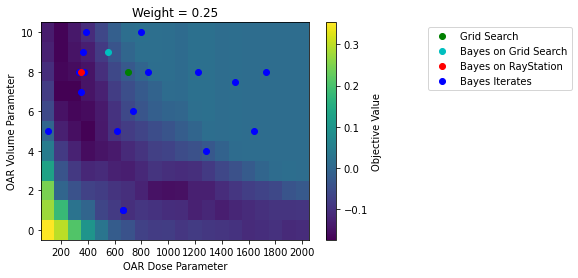

In [7]:
plot_iterates(0.25)

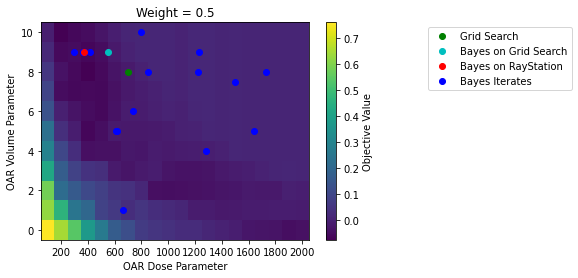

In [8]:
plot_iterates(0.5)

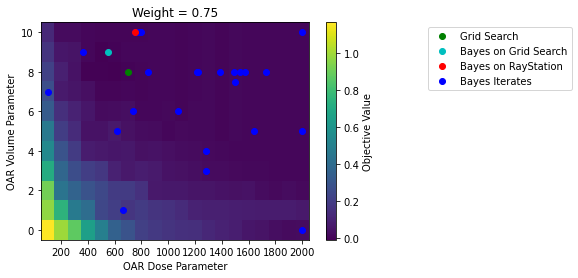

In [9]:
plot_iterates(0.75)

# Plot dose-volume histograms

In [10]:
# Approved plan dvh
dvh_dose_app = np.load('approved/dvh_doses_approved.npy')
dvh_oar_app = np.load('approved/dvh_oar_approved.npy')
dvh_ptv_app = np.load('approved/dvh_ptv_approved.npy')

def plot_dvh(weight):
    """Plot dose-volume histogram."""
    # Load data
    dvh_dose_norm = np.load(f'weight_{int(100*weight)}/dvh_dose_norm.npy')
    dvh_oar_norm = np.load(f'weight_{int(100*weight)}/dvh_oar_norm.npy')
    dvh_ptv_norm = np.load(f'weight_{int(100*weight)}/dvh_ptv_norm.npy')
    
    # Plot dvh
    plt.plot(dvh_dose_app, dvh_oar_app, 'r')
    plt.plot(dvh_dose_norm, dvh_oar_norm, 'r--')
    plt.plot(dvh_dose_app, dvh_ptv_app, 'b')
    plt.plot(dvh_dose_norm, dvh_ptv_norm, 'b--')
    
    # Annotations
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Relative Volume (%)')
    plt.legend(['Approved Plan', 'Bayes Plan'])

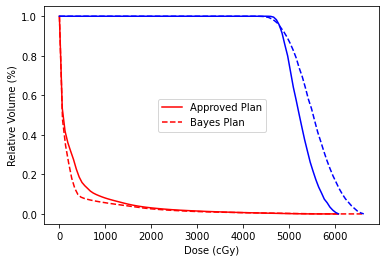

In [11]:
plot_dvh(0.25)

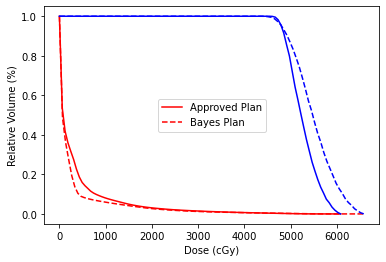

In [12]:
plot_dvh(0.5)

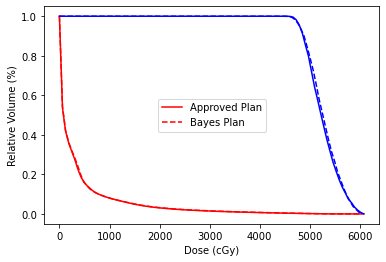

In [13]:
plot_dvh(0.75)

# Print results

In [14]:
def print_results(plan):
    # Load results
    if plan == 'approved':
        x = [2000, 8]
        oar_avg = oar_avg_app
        ptv_max = ptv_max_app
        title = 'Approved Plan'
    elif plan == 'grid':
        x = [700, 8]
        oar_avg = 305.3155093804993
        ptv_max =  6151.126953125
        title = 'Grid Search'
    elif plan == 'bayes':
        x = [548, 9]
        oar_avg = 289.6000416906954
        ptv_max = 6219.94220703125
        title = 'Bayes on Grid Search'
    else:
        x = np.load(f'weight_{int(100*plan)}/x.npy')
        oar_avg = np.load(f'weight_{int(100*plan)}/oar_avg_norm.npy')
        ptv_max = np.load(f'weight_{int(100*plan)}/ptv_max_norm.npy')
        title = f'Bayes on RayStation, Weight = {plan}'
    oar_change = 100*(oar_avg - oar_avg_app)/oar_avg_app
    ptv_change = 100*(ptv_max - ptv_max_app)/ptv_max_app
    
    # Print results
    print(title)
    print(f'Dose: {x[0]}, Volume: {x[1]}, OAR avg: {oar_avg:.3f}, PTV max: {ptv_max:.3f}, ' \
          f'OAR %: {oar_change:.3f}, PTV %: {ptv_change:.3f}\n')

In [15]:
print_results('approved') 
print_results('grid')
print_results('bayes')
print_results(0.25)
print_results(0.5)
print_results(0.75)

Approved Plan
Dose: 2000, Volume: 8, OAR avg: 318.459, PTV max: 6076.125, OAR %: 0.000, PTV %: 0.000

Grid Search
Dose: 700, Volume: 8, OAR avg: 305.316, PTV max: 6151.127, OAR %: -4.127, PTV %: 1.234

Bayes on Grid Search
Dose: 548, Volume: 9, OAR avg: 289.600, PTV max: 6219.942, OAR %: -9.062, PTV %: 2.367

Bayes on RayStation, Weight = 0.25
Dose: 347, Volume: 8, OAR avg: 240.412, PTV max: 6628.893, OAR %: -24.508, PTV %: 9.097

Bayes on RayStation, Weight = 0.5
Dose: 368, Volume: 9, OAR avg: 248.824, PTV max: 6578.551, OAR %: -21.866, PTV %: 8.269

Bayes on RayStation, Weight = 0.75
Dose: 750, Volume: 10, OAR avg: 324.598, PTV max: 6043.145, OAR %: 1.928, PTV %: -0.543



In [16]:
# Wondering what the shape of the function is related to this weight I've introduced.
# Somewhere between 0.5 and 0.75 there must be a plan similar to the Bayesian search on the grid search values.
# At the moment, I think we will stop with this objective function and pursue ones based on the clinical goals.